In [2]:
#Capital Management
#A central question in algorithmic trading is how much capital to deploy to a given
#algorithmic trading strategy given the total available capital. The answer to this ques‐
#tion depends on the main goal one is trying to achieve by algorithmic trading. Most
#individuals and financial institutions will agree that the maximization of long-term
#wealth is a good candidate objective.

In [4]:
#The Kelly Criterion in a Binomial Setting
#The common way of introducing the theory of the Kelly criterion for investing is on
#the basis of a coin tossing game, or more generally a binomial setting (where only two
#outcomes are possible). This section follows that route. Assume a gambler is playing a
#coin tossing game against an infinitely rich bank or casino. Assume further that the
#probability for heads is some value p for which 12 < p < 1 holds. Probability for tails is
#defined by q = 1 – p < 12. The gambler can place bets b > 0 of arbitrary size, whereby
#the gambler wins the same amount if right and loses it all if wrong. Given the
#assumptions about the probabilities, the gambler would of course want to bet on
#heads. Therefore, the expected value for this betting game B

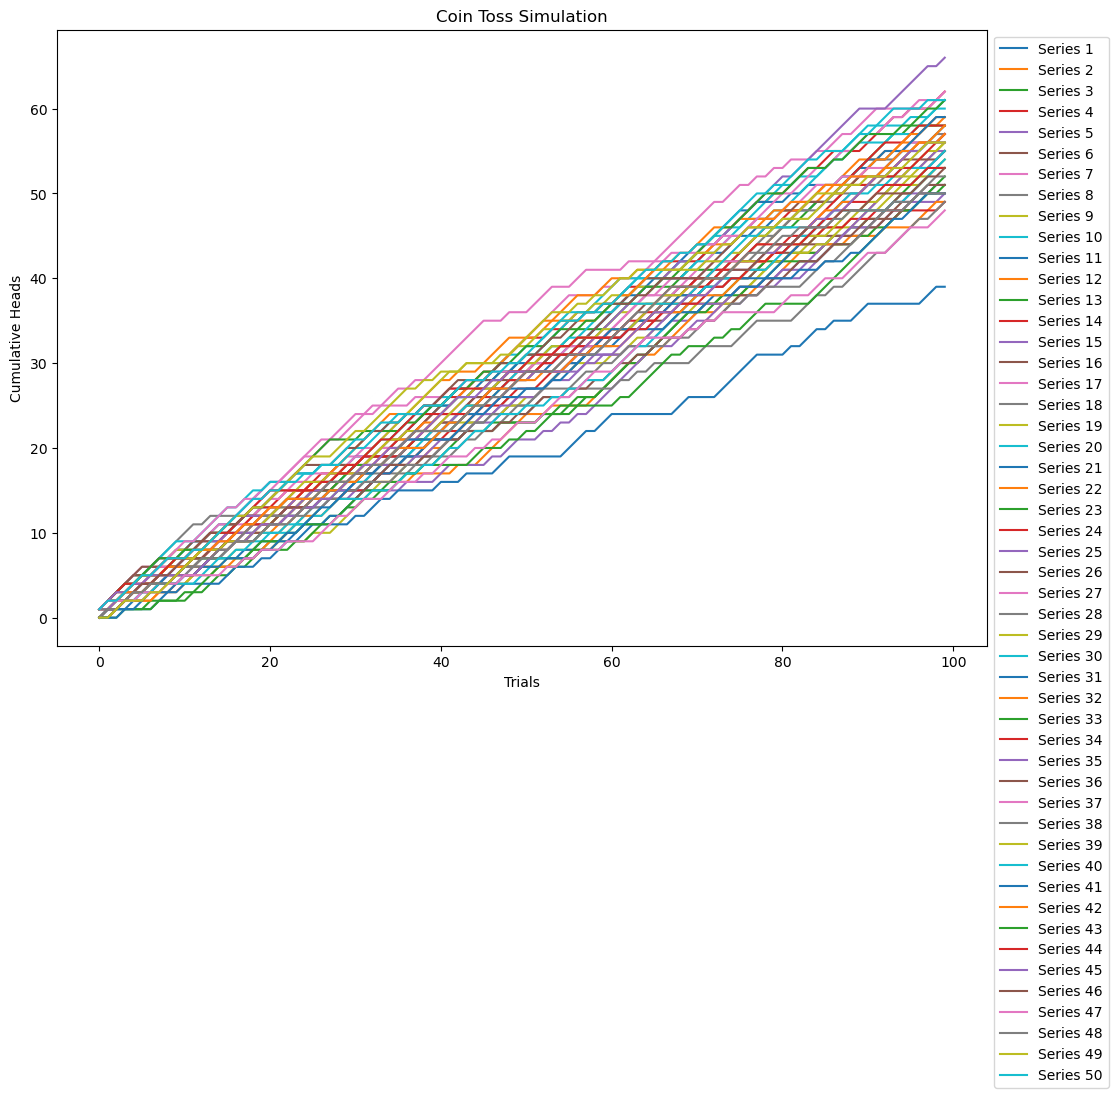

In [10]:
# Required Libraries
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(1000)

# Set matplotlib style
plt.style.use('default')  # Using default matplotlib style

# Parameters
p = 0.55  # Probability of heads
f = p - (1 - p)  # Kelly criterion optimal fraction
I = 50  # Number of series
n = 100  # Number of trials per series

# Simulation
results = np.zeros((I, n))  # Matrix to hold the results of all series

for i in range(I):
    outcomes = np.random.rand(n) < p  # Generate random outcomes
    cumulative_heads = np.cumsum(outcomes)  # Cumulative number of heads
    results[i] = cumulative_heads

# Plotting
plt.figure(figsize=(12, 8))
for i in range(I):
    plt.plot(results[i], label=f'Series {i+1}')
plt.title('Coin Toss Simulation')
plt.xlabel('Trials')
plt.ylabel('Cumulative Heads')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


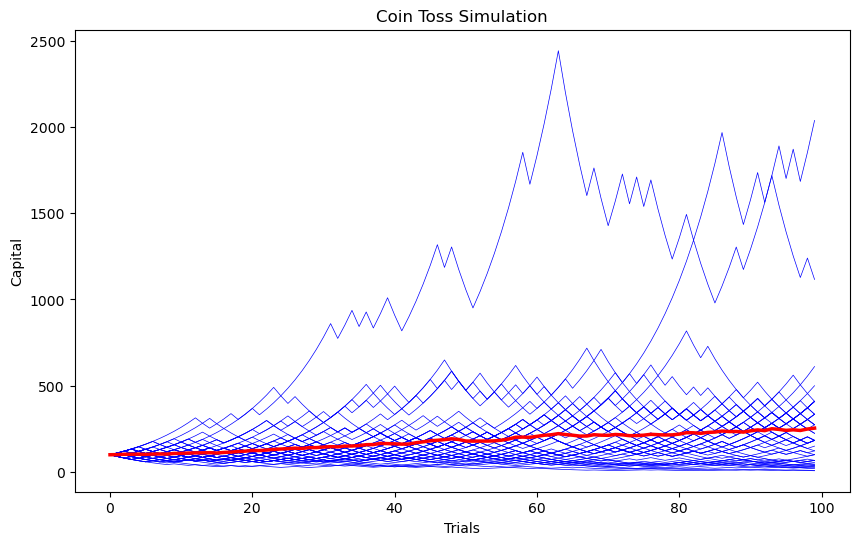

In [12]:
def run_simulation(f):
    c = np.zeros((n, I))  # Matrix to store the simulation results
    c[0] = 100  # Initial capital
    
    for i in range(I):  # Outer loop for series simulations
        for t in range(1, n):  # Inner loop for trials in series
            o = np.random.binomial(1, p)  # Simulate coin toss
            if o > 0:  # If heads
                c[t, i] = (1 + f) * c[t - 1, i]  # Update capital for heads
            else:  # If tails
                c[t, i] = (1 - f) * c[t - 1, i]  # Update capital for tails
    
    return c  # Return the simulation results

# Run the simulation
c_1 = run_simulation(f)

# Round the results for better readability (if necessary)
c_1_rounded = c_1.round(2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(c_1, 'b', lw=0.5)  # Plot all series
plt.plot(c_1.mean(axis=1), 'r', lw=2.5)  # Plot the average over all series
plt.title('Coin Toss Simulation')
plt.xlabel('Trials')
plt.ylabel('Capital')
plt.show()

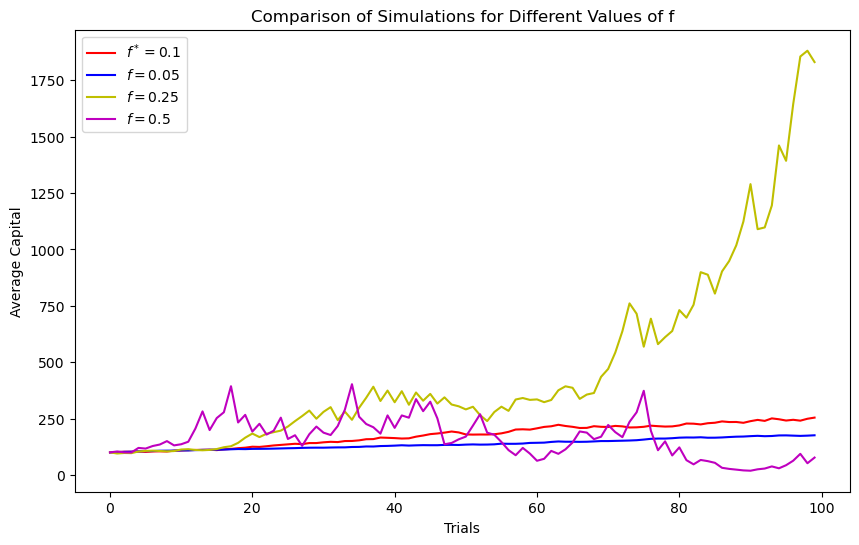

In [14]:
# Run the simulation for different values of f
c_2 = run_simulation(0.05)
c_3 = run_simulation(0.25)
c_4 = run_simulation(0.5)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.5$')
plt.legend(loc=0)
plt.title('Comparison of Simulations for Different Values of f')
plt.xlabel('Trials')
plt.ylabel('Average Capital')
plt.show()


In [16]:
#In the context of the Kelly criterion and coin toss simulations, the volatility of the capital can increase with higher values of f (the fraction of capital bet on each trial) due to the following reasons:

#Larger Bets: When f is higher, the size of each bet relative to the total capital is larger. This means that the outcomes (gains or losses) of each bet have a more significant impact on the total capital.

#Amplified Gains and Losses: With a larger fraction of capital being bet on each trial, both the gains from winning and the losses from losing are amplified. This leads to more significant fluctuations (volatility) in the capital over time.

#Risk of Large Losses: Higher values of f increase the risk of substantial losses. If a series of losing bets occurs, the capital can decrease rapidly. This increased risk contributes to higher volatility.

In [18]:
import pandas as pd
import numpy as np

# Read the data from the CSV file
raw = pd.read_csv('fin-tech/csv/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

# Define the symbol for the S&P 500 index
symbol = '.SPX'

# Create a DataFrame with the S&P 500 data
data = pd.DataFrame(raw[symbol])

# Calculate the logarithmic returns
data['returns'] = np.log(data / data.shift(1))

# Drop any missing values
data.dropna(inplace=True)

# Display the last few rows of the data
print(data.tail())


               .SPX   returns
Date                         
2017-10-25  2557.15 -0.004674
2017-10-26  2560.40  0.001270
2017-10-27  2581.07  0.008041
2017-10-30  2572.83 -0.003198
2017-10-31  2575.26  0.000944


In [20]:
#The statistical properties of the S&P 500 index are analyzed by first reading historical data from a CSV file, selecting the relevant column, and calculating the logarithmic returns. The data is then cleaned by removing any missing values. Using the historical returns, we calculate the expected excess return of the index over the risk-free rate and the variance of the returns. These metrics are used to determine the optimal leverage ratio according to the Kelly criterion. For the S&P 500 index, this results in an optimal fraction of about 4.5, indicating that for every dollar available, 4.5 dollars should be invested, implying a leverage ratio of 4.5. This aligns with the Kelly criterion, which suggests higher leverage with higher expected returns and lower volatility.

In [24]:
# Calculate the annualized return
mu = data['returns'].mean() * 252
print(mu)

# Calculate the annualized volatility
sigma = data['returns'].std() * (252 ** 0.5)
print(sigma)

# Set the risk-free rate to 0 (for simplicity)
r = 0.0

# Calculate the optimal Kelly fraction to be invested in the strategy
f = (mu - r) / (sigma ** 2)
print(f)


0.10497958736209669
0.14873313291524654
4.745581205295807


In [ ]:
equs = []

def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    data[equ] = 1
    data[cap] = data[equ] * f
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        data.loc[t, cap] = data[cap].loc[t_1] * math.exp(data['returns'].loc[t])
        data.loc[t, equ] = data[cap].loc[t] - data[cap].loc[t_1] + data[equ].loc[t_1]
        data.loc[t, cap] = data[equ].loc[t] * f

# Simulate the Kelly criterion-based strategy for different leverage ratios
kelly_strategy(f * 0.5)
kelly_strategy(f * 0.66)
kelly_strategy(f)

# Print the last few rows of the equity columns for verification
print(data[equs].tail())

# Plot the cumulative returns of the index and the simulated strategies
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True, figsize=(10, 6))
data[equs].plot(ax=ax, legend=True)
plt.show()

/var/folders/05/6wjk98893x39crd_fp3bt1s80000gn/T/ipykernel_30133/2627708325.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.0012944164411026' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[t, equ] = data[cap].loc[t] - data[cap].loc[t_1] + data[equ].loc[t_1]
/var/folders/05/6wjk98893x39crd_fp3bt1s80000gn/T/ipykernel_30133/2627708325.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.001708629702255' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[t, equ] = data[cap].loc[t] - data[cap].loc[t_1] + data[equ].loc[t_1]
/var/folders/05/6wjk98893x39crd_fp3bt1s80000gn/T/ipykernel_30133/2627708325.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.0025888328822052' has 

            equity_2.37  equity_3.13  equity_4.75
Date                                             
2017-10-25     5.158598     7.078804     9.832185
2017-10-26     5.174155     7.106983     9.891486
2017-10-27     5.273268     7.286684    10.270438
2017-10-30     5.233323     7.213824    10.114839
2017-10-31     5.245051     7.235164    10.160175


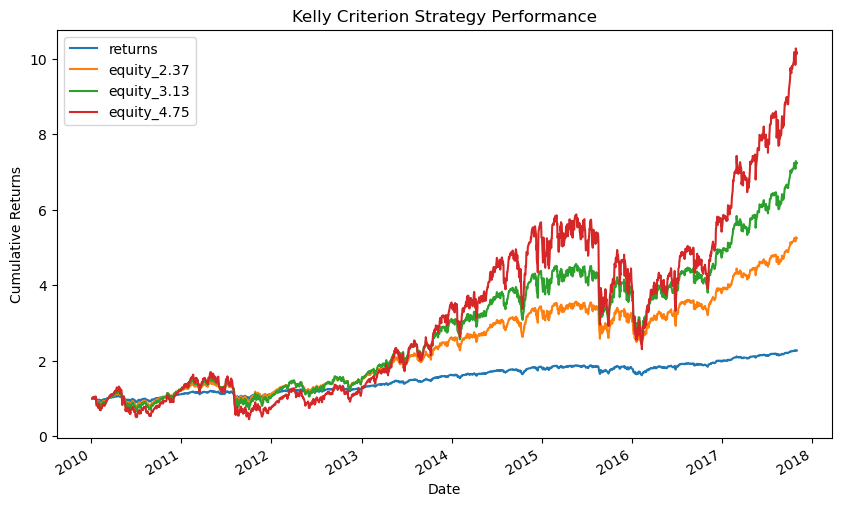

In [27]:
equs = []

def kelly_strategy(f):
    """
    Simulates the Kelly criterion-based strategy with a given leverage ratio.
    
    Parameters:
    f (float): The fraction of capital to be invested according to the Kelly criterion.
    """
    global equs
    # Name the equity and capital columns based on the leverage ratio
    equ = 'equity_{:.2f}'.format(f)
    cap = 'capital_{:.2f}'.format(f)
    
    # Add the equity column name to the list
    equs.append(equ)
    
    # Initialize equity to 1 and capital to equity * leverage ratio
    data[equ] = 1
    data[cap] = data[equ] * f
    
    # Iterate over each day in the data starting from the second day
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]  # Previous day's index
        
        # Update capital based on the return of the current day
        data.loc[t, cap] = data[cap].loc[t_1] * math.exp(data['returns'].loc[t])
        
        # Update equity based on the change in capital
        data.loc[t, equ] = data[cap].loc[t] - data[cap].loc[t_1] + data[equ].loc[t_1]
        
        # Recalculate capital for the next day based on updated equity
        data.loc[t, cap] = data[equ].loc[t] * f

# Simulate the Kelly criterion-based strategy for different leverage ratios
kelly_strategy(f * 0.5)   # Half of the optimal fraction
kelly_strategy(f * 0.66)  # Two-thirds of the optimal fraction
kelly_strategy(f)         # The full optimal fraction

# Print the last few rows of the equity columns for verification
print(data[equs].tail())

# Plot the cumulative returns of the index and the simulated strategies
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True, figsize=(10, 6))
data[equs].plot(ax=ax, legend=True)
plt.title('Kelly Criterion Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


In [ ]:
#Figure demonstrates that applying the optimal Kelly leverage, which results in a leverage ratio of approximately 4.47, leads to a highly volatile and erratic evolution of the equity position. This high volatility is expected due to the significant leverage employed, which amplifies both gains and losses. To mitigate this risk, practitioners often use a reduced leverage strategy, such as the "half Kelly" approach, which in this case corresponds to a leverage ratio of around 2.23. This strategy is also depicted in Figure 16-3, showing that reducing the leverage ratio decreases the volatility of the equity position, making the investment less risky while still adhering to the principles of the Kelly criterion.

In [29]:


#Concise Explanation
#Equity and Capital Initialization: New columns for equity and capital are created for each leverage ratio, with the initial equity set to 1 and initial capital set to equity multiplied by the leverage ratio.
#Simulation Loop: For each day in the data, the capital is updated based on the returns, and the equity is adjusted according to the performance of the capital.
#Multiple Strategies: The strategy is simulated for half of the optimal fraction (f * 0.5), two-thirds of the optimal fraction (f * 0.66), and the full optimal fraction (f).
#Plotting: The cumulative returns of the index and the simulated strategies are plotted to compare their performance.